## Autralia Rain Prediction on the dataset avilable in kaggle
## https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

**Importing liabries**

In [35]:
import numpy as np # for linear algebra
import pandas as pd #for df and dara processing
#for plotting 
import matplotlib.pyplot as plt
import seaborn as sns



**Importing dataset**

In [36]:
df=pd.read_csv('./weatherAUS.csv')

In [37]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Data exploration and visualization**

In [38]:
df.shape # gives shape of the data

(145460, 23)

In [39]:
col_names=df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [40]:
df.info() #info of data with dtypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [41]:
df.describe() #stats of numbers data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [42]:
df['Date']=pd.to_datetime(df['Date'])

In [43]:
df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

df['Day'] = df['Date'].dt.day

##changed date to year month day and now drop date
df.drop('Date',inplace= True,axis=1)

In [44]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

**Understanding output i.e Rain tomorrow**

In [45]:
df.RainTomorrow.isnull().sum() #how many missing op in 145460 datas

3267

In [46]:
df.RainTomorrow.unique()  # to see o/p classes

array(['No', 'Yes', nan], dtype=object)

In [47]:
df.RainTomorrow.value_counts() # to find counts of classes

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

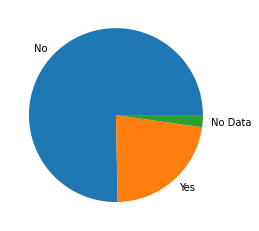

In [48]:
#visuallize output
data=[110316,32877,3267]
labels=['No','Yes','No Data']
plt.pie(data, labels = labels)
plt.show()

#Visualizing and Understanding data#

In [49]:
# Explore location variable
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [50]:
df["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

<AxesSubplot:>

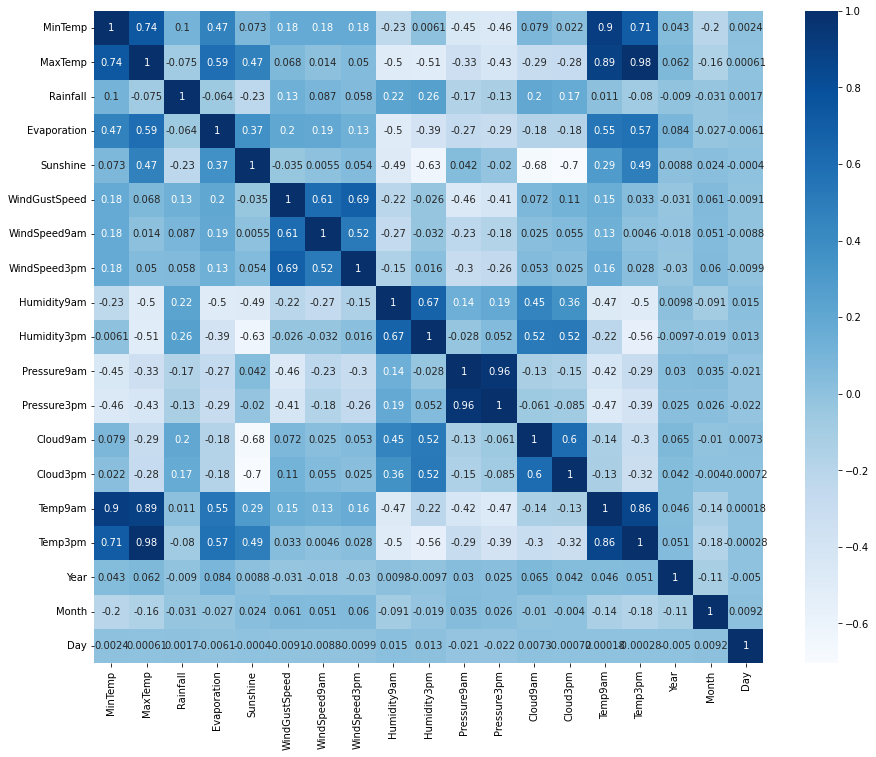

In [51]:
# Plotting correlation matrix

corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,cmap='Blues',annot=True)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


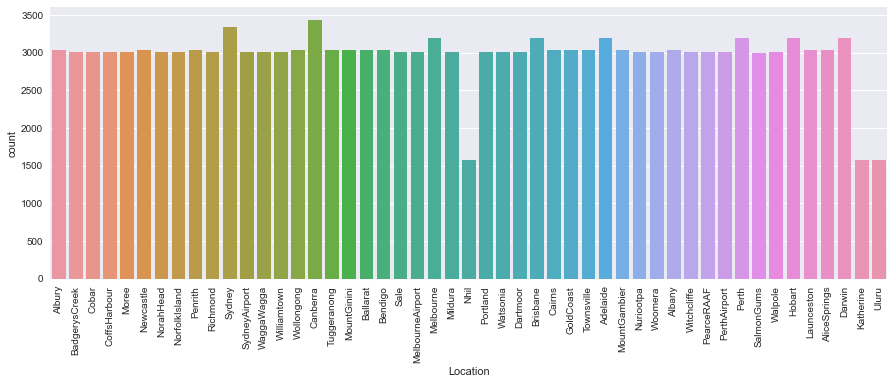

In [52]:
# Location Data
plt.style.use('seaborn')

# Distribution of location

plt.figure(figsize=(15, 5))
sns.countplot(df['Location'])
plt.xticks(rotation=90)
plt.show()

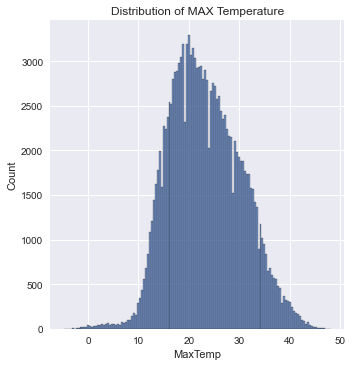

In [53]:

sns.displot(df['MaxTemp'])
plt.title("Distribution of MAX Temperature")
plt.show()

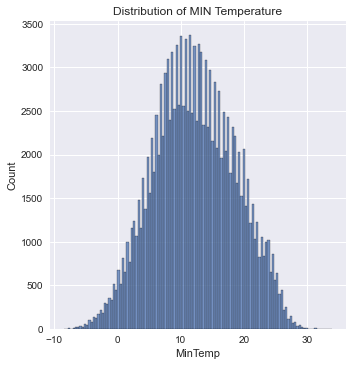

In [54]:

sns.displot(df['MinTemp'])
plt.title("Distribution of MIN Temperature")
plt.show()

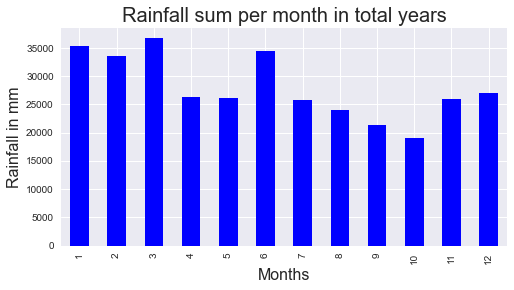

In [55]:
# to see how much rain in which month
plt.figure(figsize=(8,4))
rainPerMonth=df.groupby('Month').Rainfall.sum()
rainPerMonth.plot(kind='bar', color='blue')
plt.title("Rainfall sum per month in total years",fontsize=20)
plt.xlabel('Months',fontsize=16)
plt.ylabel('Rainfall in mm', fontsize=16)

plt.show()

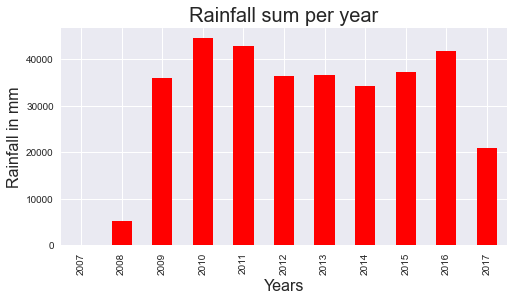

In [56]:
# to see how much rain in which year
plt.figure(figsize=(8,4))
rainPerMonth=df.groupby('Year').Rainfall.sum()
rainPerMonth.plot(kind='bar', color='red')
plt.title("Rainfall sum per year",fontsize=20)
plt.xlabel('Years',fontsize=16)
plt.ylabel('Rainfall in mm', fontsize=16)

plt.show()

## Observing and dropping datas or rows as nan

In [57]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [58]:
df.shape

(145460, 25)

In [59]:
## as we can observe    Cloud9am     Cloud3pm  Evaporation Sunshine      has too much null data do drop them

In [60]:
df=df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1)
df.shape

(145460, 21)

In [61]:
#drop na
df=df.dropna(axis=0)
df.shape

(112925, 21)

##lets see reln of input ann op


In [62]:
## first lets encode all objss

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Location']=le.fit_transform(df['Location'])
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])
df['RainToday']=le.fit_transform(df['RainToday'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])





In [63]:
df.head(3)


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3


# test train input output

In [64]:
x=df.drop(['RainTomorrow'],axis=1)
y=df.RainTomorrow

In [65]:
x.head(3)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,2008,12,1
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,2008,12,2
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,2008,12,3


In [66]:
## lets see reln between input and output with some visualizations


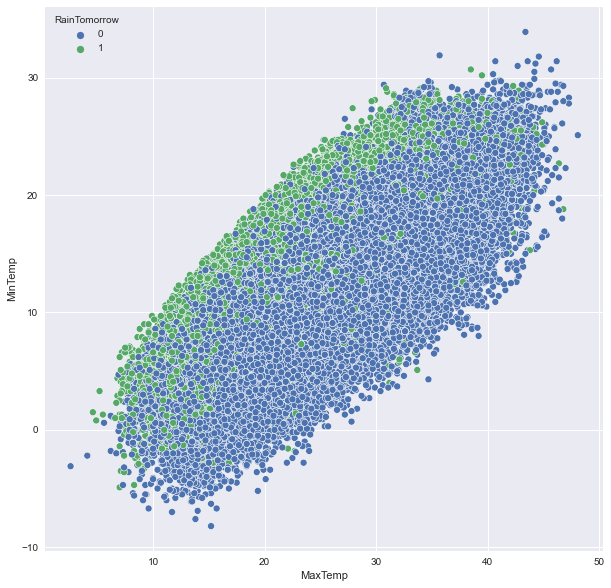

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='MaxTemp',y="MinTemp",hue="RainTomorrow",data=df)
plt.show()

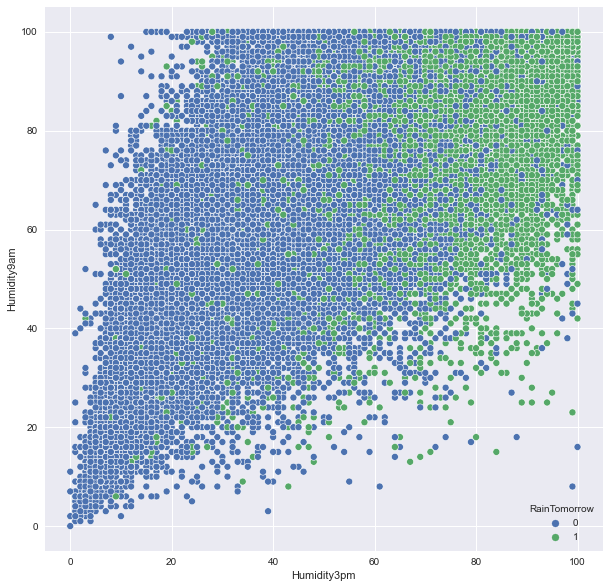

In [68]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Humidity3pm',y="Humidity9am",hue="RainTomorrow",data=df)
plt.show()

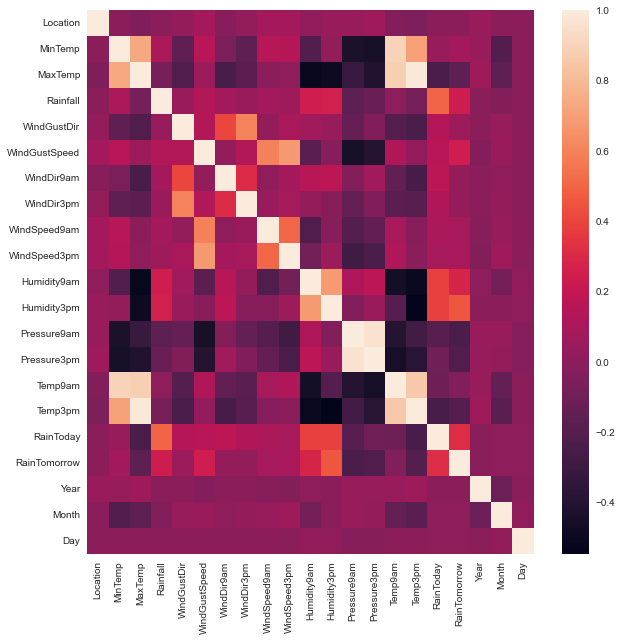

In [69]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

## test train data split


In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [71]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Logistic Regression


In [72]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)
predictionslr=lr.predict(x_test)


print(accuracy_score(y_test,predictionslr))


0.8505202568076157


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [73]:
print(classification_report(y_test,predictionslr))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17673
           1       0.73      0.49      0.59      4912

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585



In [74]:
print(confusion_matrix(y_test,predictionslr))

[[16782   891]
 [ 2485  2427]]


## Decesion Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictionsdt=dt.predict(x_test)


print(accuracy_score(y_test,predictionsdt))


0.7918972769537304


In [76]:
print(classification_report(y_test,predictionsdt))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     17673
           1       0.52      0.55      0.54      4912

    accuracy                           0.79     22585
   macro avg       0.70      0.71      0.70     22585
weighted avg       0.80      0.79      0.79     22585



In [77]:
print(confusion_matrix(y_test,predictionsdt))

[[15171  2502]
 [ 2198  2714]]


## SVM 

In [78]:
from sklearn import svm
sv=svm.SVC()
sv.fit(x_train,y_train)
predictionssv=dt.predict(x_test)


print(accuracy_score(y_test,predictionssv))


0.7918972769537304


In [79]:
print(classification_report(y_test,predictionssv))
print(confusion_matrix(y_test,predictionssv))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     17673
           1       0.52      0.55      0.54      4912

    accuracy                           0.79     22585
   macro avg       0.70      0.71      0.70     22585
weighted avg       0.80      0.79      0.79     22585

[[15171  2502]
 [ 2198  2714]]


In [81]:
from sklearn.model_selection import GridSearchCV
grid={"kernel":['linear', 'poly', 'rbf', 'sigmoid']}
svc_best=GridSearchCV(estimator=sv,param_grid=grid,verbose=2)
svc_best.fit(x_train,y_train)
preds=svc_best.predict(x_test)
print(accuracy_score(y_test,preds))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................................kernel=linear; total time=12.0min
[CV] END ......................................kernel=linear; total time=11.7min
[CV] END ......................................kernel=linear; total time=11.7min
[CV] END ......................................kernel=linear; total time=10.1min
[CV] END ......................................kernel=linear; total time=10.0min
[CV] END ........................................kernel=poly; total time= 4.1min
[CV] END ........................................kernel=poly; total time= 2.4min
[CV] END ........................................kernel=poly; total time= 4.1min
[CV] END ........................................kernel=poly; total time= 5.4min
[CV] END ........................................kernel=poly; total time= 4.0min
[CV] END .........................................kernel=rbf; total time= 6.8min
[CV] END ........................................

In [82]:
print(accuracy_score(y_test,preds))

0.8536639362408678


In [85]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17673
           1       0.74      0.51      0.60      4912

    accuracy                           0.85     22585
   macro avg       0.81      0.73      0.76     22585
weighted avg       0.84      0.85      0.84     22585



In [86]:
print(confusion_matrix(y_test,preds))

[[16786   887]
 [ 2418  2494]]
